#TESTING ALL FUNCTION OF MINST CLASS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from mnist import Mnist  # Import the Mnist class 

<!-- Load and Preprocess Image Function -->

In [32]:
def load_and_preprocess_image(image_path):
    """Load and preprocess a single image for prediction."""
    # Load the image using OpenCV
    img = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if img is None:
        raise ValueError(f"Image not found or unable to load: {image_path}")

    # Convert to grayscale if the image is colored
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Resize the image to 28x28 pixels
    img = cv2.resize(img, (28, 28))

    # Apply binary thresholding to enhance features
    _, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

    # Normalize the image data to [0, 1] range
    img = img.astype(np.float32) / 255.0

    # Flatten the image to (784,) for the model input
    img = img.flatten()  # This creates a 1D array of 784 elements

    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title("Preprocessed Image")
    plt.show()

    return img 

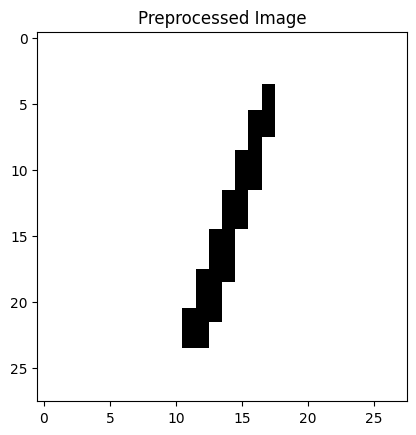

In [33]:
Image = load_and_preprocess_image("D:/yumyenta/output_images/image_2.png")

In [34]:
type(Image) # one dimensional array of 784 elements !!

numpy.ndarray

In [ ]:
# Check for sigmoid function
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

In [13]:
sigmoid(10)

np.float64(0.9999546021312976)

In [ ]:
#check for softmax function
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    return exp_a / np.sum(exp_a)

In [15]:
softmax([10,20,30,50])

array([4.24835425e-18, 9.35762295e-14, 2.06115362e-09, 9.99999998e-01])

In [ ]:
#function for Loading the weights 
import os 
def init_network():
    file_path = 'model/sample_weight.pkl'
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")
    
    with open(file_path, 'rb') as f:
        try:
            params = pickle.load(f, encoding='latin1')  # Add encoding if compatibility is an issue
            print("Network initialized successfully.")
            return params
        except Exception as e:
            print("Error loading network:", e)
            return None


In [24]:
params_dict = init_network()

Network initialized successfully.


In [ ]:
# Predict function 
def predict(x):
        w1, w2, w3 = params_dict['W1'], params_dict['W2'], params_dict['W3']
        b1, b2, b3 = params_dict['b1'], params_dict['b2'], params_dict['b3']

        a1 = np.dot(x, w1) + b1
        z1 = sigmoid(a1)

        a2 = np.dot(z1, w2) + b2
        z2 = sigmoid(a2)

        a3 = np.dot(z2, w3) + b3
        y =  softmax(a3)
        return y

In [36]:
predict(Image)

array([0.02345406, 0.03054364, 0.12347839, 0.19520384, 0.00220373,
       0.11706125, 0.09994841, 0.20971692, 0.09221351, 0.10617628],
      dtype=float32)